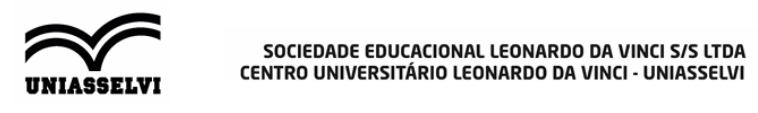

**Nome do Acadêmico:** Adilio de Sousa Farias

**Matrícula:** 3275870

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

## Etapa 1: Definições do Projeto

### Descrição do Tema
O tema do presente trabalho será um sistema de Credit Scoring, para calcular a probabilidade de um banco conceder ou não crédito a um cliente baseado em informações das features do cadastro do cliente disponível na base de dados do banco.

1) O que é Credit Scoring?

Concessão de crédito envolve um complexo cenário de incertezas, em que sempre existe a possibilidade de perda. Então, se pudermos estimar a probabilidade da perda, poderemos tomar melhores decisões. A partir disso, podemos definir clientes bons e clientes maus (quando incorremos em perda em uma operação de crédito) a partir de uma medida de probabilidade de perda a ser calculada com base nos antecedentes do cliente.



A partir desta medida temos decisões como conceder ou não crédito, definir taxas, prazos, garantias, dentre outras questões que são de atribuição dos gestores de crédito. Outras decisões que podem ser tomadas com as faixas de score são: manutenção/adequação do limite de crédito; estratégias de marketing para oferta de outros produtos a depender do perfil do cliente, dentre outras.
Vantagens de se mensurar o risco de crédito de forma objetiva (com técnicas quantitativas):

*Consistência nas decisões: o score é o mesmo independentemente do analista ou da agência, dado que as características da solicitação sejam inalteradas.

*Decisões rápidas: centenas/milhares de decisões podem ser tomadas.

*Decisões adequadas: definições de taxas a depender do grau de risco do cliente.

*Decisão à distância: após a imputação de dados obtemos uma decisão de crédito a ser repassada ao solicitante.



2) Aplicações:

*Decisão de crédito em massa (alta demanda de solicitação de crédito em um pequeno intervalo de tempo).

*Processo automatizado de decisão.



3) Modelos de crédito:

Podemos aplicar modelos de credit scoring para solicitantes de crédito que sejam clientes ou ex-clientes, estes são denominados de behavioral scoring. Por outro lado, também podemos desenvolver modelos para solicitantes que não sejam clientes ou que não tenhamos um histórica (modelo application scoring).

Nos modelos de behavioral usamos o histórico de uso de crédito, além de variáveis consideradas nos modelos de application scoring.

Por exemplo, no caso de clientes que honram seus empréstimos temos que essa informação contribuirá positivamente. Já clientes que tiveram atraso teremos uma contribuição negativa para o escore.

Os modelos de behavioral tendem a apresentar um grau maior de discriminação em comparação com os modelos de application scoring.

### Objetivo


Esse projeto tem como objetivo a modelagem de crédito, que irá prever a probabilidade da perda, tendo em vista que o crédito tenha sido concedido. A probabilidade de perda denominamos de risco de crédito.

*Risco de crédito = probabilidade de perda.

*Credit score = medida de risco de crédito.

## Especificação Técnica


### Base de Dados
Para esse trabalho, utilizaremos uma base de dados não pública, baseada em uma pequena amostra da base cadastral do banco X, para que os resultados a serem previstos possuam alguma aderência de realidade para onde se destina esse projeto de dados. Os arquivos da base de dados deverão ser carregados para o ambiente do Google Colab no menu à esquerda desse notebook e será referenciada na segunda célula de código, mais abaixo, após a importação das bibliotecas Python. Os arquivos serão disponibilizados na plataforma Uniasselvi junto com este notebook.

Essa base está dividida em três tabelas, separadas em três arquivos em formato CSV, de onde sairão as features que iremos usar nos modelos de Machine Learning. A primeira tabela é a do cadastro em si, a segunda mostra um histórico de atrasos em operações de crédito e a terceira são informações de escolaridade e renda dos clientes. As colunas das três tabelas estão definidas assim:

1) TB_CADASTRO

*id

*tp_sexo

*UF: unidade da federação de residência do cliente.

*status_civil

*n_dependentes: número de dependentes do cliente.

*casa_propria: se o cliente possui ou não casa própria.


2) TB_ATRASO

*id


*max_dias_atraso_6m: atraso do cliente em pagamentos anteriores da fatura de cartão de crédito, sendo um dado interno da empresa.


*programa_reneg: se o cliente participou ou não do programa interno da empresa de renegociação de dívidas de cartão de crédito.


3) TB_JOB


*id


*escolaridade


*tempo_empregado


*modelo_renda_v2: modelo de inferência de renda do cliente.


*classe_renda_inf: inferência da classe social do cliene, com base no seu nível de renda.

Utilizaremos as bibliotecas pandas, numpy e matplotlib do Python para realizar o pré-processamento desses dados e deixá-los prontos para a divisão dos dados em base de treino e base de teste para os métodos de ML que serão usados no projeto.


### Métodos de ML

Para esse estudo utilizaremos três métodos de aprendizado de máquina: Logistic Regression, Decision Tree e Random Forest usando a biblioteca Scikit-learn do Python.

### Métricas de Avaliação

Utilizaremos para avaliação de desempenho dos modelos, através de Validação Cruzada, o melhor desempenho entre o Teste de Curva Roc e F1 Score e exibiremos um Mapa de Calor para visualizar a melhor avaliação.

## Etapa II: Exploração, Análise Inicial e Pré-Processamento dos Dados

### Importação das Bibliotecas e visualização dos dados

Nessa etapa vamos importar as bibliotecas que utilizaremos no projeto e visualizar os dataframes para ter uma compreensão inicial dos dados.

In [3]:
# Importando as bibliotecas
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carregando os arquivos
tb_job = pd.read_csv('/content/tb_job.csv').set_index('id')
tb_cadastro = pd.read_csv('/content/tb_cadastro.csv').set_index('id')
tb_atraso = pd.read_csv('/content/tb_atraso.csv').set_index('id')

In [5]:
# Visualizando o Dataframe de Cadastro
# A coluna casa_propria é uma variável categórica booleana que representa 0 para 'não possui' e 1 para 'possui'
tb_cadastro.head(10)

,tp_sexo,uf,status_civil,n_dependentes,casa_propria
id,,,,,
8927457,M,SP,SOLTEIRO,0,1
22009007,M,SP,SOLTEIRO,0,0
30794041,F,SP,SOLTEIRO,0,0
13342495,M,RJ,SOLTEIRO,0,0
73110407,M,SP,C,0,1
45730787,M,SP,CAsado,2,0
99681653,F,SP,SOLTEIRO,1,1
9294793,M,SP,SOLTEIRO,1,0
54323383,M,SP,SOLTEIRO,0,0


In [6]:
# Visualizando o Dataframe de escolaridade e trabalho
tb_job.head(10)

,escolaridade,tempo_empregado,modelo_renda_v2,classe_renda_inf
id,,,,
42543947,Ensino Fundamental,9,1517,B
49524184,Ensino Fundamental,9,1654,B
29697248,Ensino Superior,5,1468,A
61147127,Ensino Fundamental,4,1535,B
25601658,Ensino Médio,14,1399,A
37380605,Ensino Superior,8,1787,B
18951794,Pós-graduação,9,1440,A
76437861,Ensino Superior,11,2247,C
56160861,Ensino Médio,7,1750,B


In [7]:
# Visualizando o dataframe de histórico de atraso
tb_atraso.head(10)

,max_dias_atraso_6m,programa_reneg
id,,
59692101,59,NÃO
3621563,64,NÃO
17013828,71,SIM
56633600,52,NÃO
34502897,56,NÃO
86563343,70,NÃO
93844168,60,NÃO
79323243,53,NÃO
20564318,49,NÃO


In [8]:
# Agora vamos juntar todas as tabelas num único dataset 
data = pd.concat([tb_job, 
                  tb_cadastro, 
                  tb_atraso], 
                 axis = 1)

In [9]:
data.head(10)

,escolaridade,tempo_empregado,modelo_renda_v2,classe_renda_inf,tp_sexo,uf,status_civil,n_dependentes,casa_propria,max_dias_atraso_6m,programa_reneg
id,,,,,,,,,,,
1000279,Ensino Médio,16,2015,C,M,RJ,CASADO,0,0,57,NÃO
1000558,Ensino Fundamental,8,1715,B,F,RJ,SOLTEIRO,0,0,58,NÃO
1000841,Ensino Médio,8,2065,C,F,RJ,SOLTEIRO,0,1,58,NÃO
1000923,Ensino Médio,7,1703,B,M,SP,CASADO,0,0,56,NÃO
1002651,Ensino Médio,7,2226,C,M,RJ,CASADO,1,0,52,NÃO
1002677,Ensino Fundamental,11,1973,B,M,SP,SOLTEIRO,0,0,59,NÃO
1002712,Ensino Superior,8,2474,C,F,RJ,SOLTEIRO,0,0,50,NÃO
1003225,Ensino Superior,4,2113,C,F,SP,C,0,0,50,NÃO
1003375,Ensino Fundamental,9,1394,A,M,RJ,SOLTEIRO,0,1,65,NÃO


In [10]:
# Verificando o tamanho do dataset (linhas, colunas)
data.shape

(249678, 11)

In [11]:
# Verificando algumas informações sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249678 entries, 1000279 to 99999909
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   escolaridade        249678 non-null  object
 1   tempo_empregado     249678 non-null  int64 
 2   modelo_renda_v2     249678 non-null  int64 
 3   classe_renda_inf    249678 non-null  object
 4   tp_sexo             249678 non-null  object
 5   uf                  249678 non-null  object
 6   status_civil        249678 non-null  object
 7   n_dependentes       249678 non-null  int64 
 8   casa_propria        249678 non-null  int64 
 9   max_dias_atraso_6m  249678 non-null  int64 
 10  programa_reneg      249678 non-null  object
dtypes: int64(5), object(6)
memory usage: 22.9+ MB


### Pré-Processamento dos Dados

Nesta etapa iremos verificar a qualidade dos dados, analisando preenchimento das variáveis, valores ausentes, duplicidade de linhas, dentre outros aspectos.

In [12]:
# Vamos definir algumas funções Python para limpeza, que serão instanciadas mais abaixo.
def contar_linhas_duplicadas(data_frame):
    "Recebe um DataFrame e retorna se o DataFrame possui linhas duplicadas ou não."
    contar_duplicidade = data_frame.duplicated().sum()
    if contar_duplicidade > 0:
        return True
    return False

def colunas_constantes(data_frame):
    "Retorna uma lista com as colunas constantes do DataFrame."
    return data_frame.columns[data_frame.nunique() == 1].tolist()

def low_variance(data_frame, threshold):
    "Conta a variância das variáveis do DataFrame, mapeando low variance."
    minmax_scaler = MinMaxScaler()
    numerical_columns = data.select_dtypes('number')
    data_frame_scaled = pd.DataFrame(minmax_scaler.fit_transform(numerical_columns),
                                     columns = numerical_columns.columns.tolist()
                                    )

    low_variance = list()
    for column in data_frame_scaled:
        var = data_frame_scaled[column].var()
        if var < threshold:
            low_variance.append(column)

    return low_variance

def pct_nan(data_frame):
    "Mensura o percentual de NaN."
    return np.multiply(data_frame.isna().sum() / data_frame.shape[0], 100).round(2)

### Verificação de possíveis inconsistências

In [13]:
# sumário estatístico das variáveis
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tempo_empregado,249678.0,10.00,3.16,0.0,8.0,10.0,12.0,27.0
modelo_renda_v2,249678.0,1769.18,351.75,1200.0,1513.0,1704.0,2037.0,9841.0
n_dependentes,249678.0,0.47,0.89,0.0,0.0,0.0,1.0,4.0
casa_propria,249678.0,0.22,0.41,0.0,0.0,0.0,0.0,1.0
max_dias_atraso_6m,249678.0,59.98,7.74,28.0,55.0,60.0,65.0,95.0


In [14]:
# Checando se há dados faltantes
data.isna().sum()

escolaridade          0
tempo_empregado       0
modelo_renda_v2       0
classe_renda_inf      0
tp_sexo               0
uf                    0
status_civil          0
n_dependentes         0
casa_propria          0
max_dias_atraso_6m    0
programa_reneg        0
dtype: int64

In [15]:
# Verificando valores únicos em cada coluna
data.nunique()

escolaridade             4
tempo_empregado         27
modelo_renda_v2       1550
classe_renda_inf         3
tp_sexo                  2
uf                       2
status_civil             4
n_dependentes            5
casa_propria             2
max_dias_atraso_6m      68
programa_reneg           2
dtype: int64

In [16]:
# Verificando se há linhas duplicadas com a função criada mais acima
contar_linhas_duplicadas(data)

True

In [17]:
# Vamos remover as linhas duplicadas encontradas
data.drop_duplicates(inplace = True)

In [18]:
# Verificando novamente se há linhas duplicadas
contar_linhas_duplicadas(data)

False

In [19]:
# check de baixa variância para as colunas numéricas
low_variance(data, 0.001)

[]

### Visualização dos Dados

Vamos construir agora umas visualizações do dataset já limpo.

In [20]:
data.head(10)

,escolaridade,tempo_empregado,modelo_renda_v2,classe_renda_inf,tp_sexo,uf,status_civil,n_dependentes,casa_propria,max_dias_atraso_6m,programa_reneg
id,,,,,,,,,,,
1000279,Ensino Médio,16,2015,C,M,RJ,CASADO,0,0,57,NÃO
1000558,Ensino Fundamental,8,1715,B,F,RJ,SOLTEIRO,0,0,58,NÃO
1000841,Ensino Médio,8,2065,C,F,RJ,SOLTEIRO,0,1,58,NÃO
1000923,Ensino Médio,7,1703,B,M,SP,CASADO,0,0,56,NÃO
1002651,Ensino Médio,7,2226,C,M,RJ,CASADO,1,0,52,NÃO
1002677,Ensino Fundamental,11,1973,B,M,SP,SOLTEIRO,0,0,59,NÃO
1002712,Ensino Superior,8,2474,C,F,RJ,SOLTEIRO,0,0,50,NÃO
1003225,Ensino Superior,4,2113,C,F,SP,C,0,0,50,NÃO
1003375,Ensino Fundamental,9,1394,A,M,RJ,SOLTEIRO,0,1,65,NÃO


Text(0.5, 1.0, 'Escolaridade')

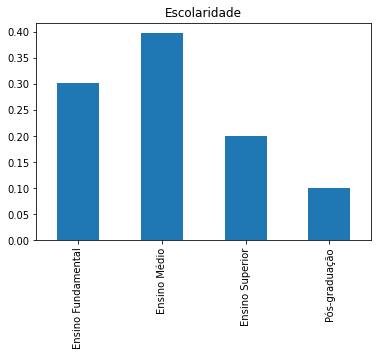

In [21]:
# Gráfico de barras verticais com dados normalizados da coluna escolaridade
data['escolaridade'].value_counts(normalize = True).sort_index().plot(kind = 'bar')
plt.title('Escolaridade')

Text(0.5, 1.0, 'Clientes por nível de renda')

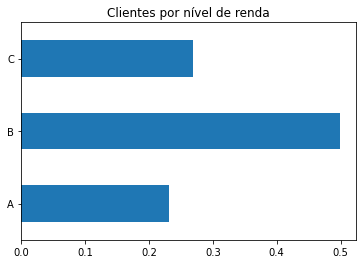

In [22]:
# Gráfico de barras horizontais com dados normalizados da coluna classe_renda_inf
data['classe_renda_inf'].value_counts(normalize = True).sort_index().plot(kind = 'barh')
plt.title('Clientes por nível de renda')

Text(0.5, 0.98, 'Distribuição das variáveis')

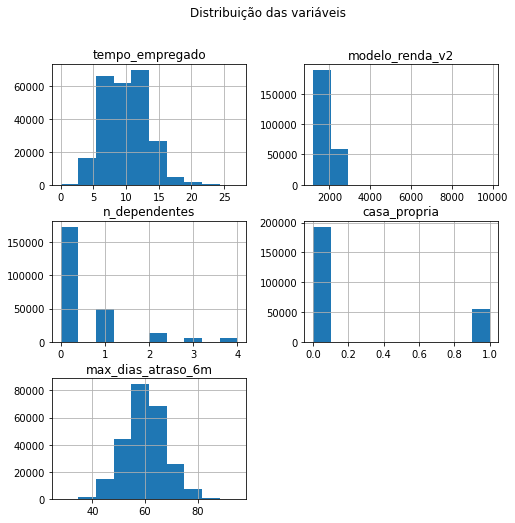

In [23]:
# Gráfico de subplots com histogramas das demais colunas relevantes do dataset
fig, ax = plt.subplots(figsize = (8,8))
data[['tempo_empregado', 'modelo_renda_v2', 'n_dependentes', 'casa_propria', 'max_dias_atraso_6m']].hist(ax = ax)
fig.suptitle('Distribuição das variáveis')

### Feature Engineering

Agora vamos preparar as variáveis (colunas) para o modelo.

In [24]:
# Selecionando colunas do tipo object do dataset
cat_cols = data.select_dtypes(include = 'object')

In [25]:
# Verificando valores únicos de cada coluna do tipo object
for col in cat_cols:
    print(col)
    print(cat_cols[col].unique());print()

escolaridade
['Ensino Médio' 'Ensino Fundamental' 'Ensino Superior' 'Pós-graduação']

classe_renda_inf
['C' 'B' 'A']

tp_sexo
['M' 'F']

uf
['RJ' 'SP']

status_civil
['CASADO' 'SOLTEIRO' 'C' 'CAsado']

programa_reneg
['NÃO' 'SIM']



In [26]:
# Vamos mapear valores inteiros para as variáveis categóricas do dataset
data['escolaridade'] = data.escolaridade.map({'Ensino Fundamental': 1, 
                                 'Ensino Médio': 2,
                                 'Ensino Superior': 3,
                                 'Pós-graduação': 4
                                })

data['classe_renda_inf'] = data.classe_renda_inf.map({'A': 1,
                                                  'B': 2,
                                                  'C': 3
                                                 })

data['tp_sexo'] = data.tp_sexo.map({'M': 1, 'F': 0})

data['uf'] = data.uf.map({'SP': 1, 'RJ': 0})

data['status_civil'] = data.status_civil.str.lower().map({'solteiro': 0, 
                                                          'c': 1, 
                                                          'casado': 1})

data['programa_reneg'] = data.programa_reneg.map({'SIM': 1, 'NÃO': 0})

data['target'] = data.max_dias_atraso_6m.apply(lambda x: 1 if x >= 60 else 0)

## Etapa III: Criação, Validação, Ajustes e Testes do Modelo Preditivo

### Criação do modelo preditivo

Nesta etapa criaremos o nosso modelo de crédito.

In [27]:
# Separando as variáveis (colunas) explicativas das preditoras
X = data.drop(columns = ['target', 'max_dias_atraso_6m'])

In [28]:
X.head()

,escolaridade,tempo_empregado,modelo_renda_v2,classe_renda_inf,tp_sexo,uf,status_civil,n_dependentes,casa_propria,programa_reneg
id,,,,,,,,,,
1000279,2,16,2015,3,1,0,1,0,0,0
1000558,1,8,1715,2,0,0,0,0,0,0
1000841,2,8,2065,3,0,0,0,0,1,0
1000923,2,7,1703,2,1,1,1,0,0,0
1002651,2,7,2226,3,1,0,1,1,0,0


In [29]:
# Separando a variável-alvo da previsão
y = data.target

In [30]:
# Normalizando os dados da variável preditora
y.value_counts(normalize = True)

1    0.514457
0    0.485543
Name: target, dtype: float64

In [31]:
# Separando os dados em conjunto de treinamento e conjunto de teste em proporção 70%/30%
SEED = 1321
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = SEED,
                                                    test_size = 0.3
                                                   )

### Validação cruzada dos algoritmos de ML

Vamos testar os seguintes algoritmos na validação cruzada: Logistic Regression, Decision Tree e Random Forest e vamos avaliar cada um segundo o método da Curva ROC e o método F1 Score.

#### Algoritmo Logistic Regression

In [32]:
# Definindo a validação cruzada nos dados de treino
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = SEED)
reglog = LogisticRegression()
cv_scores_reglog = cross_validate(
    estimator = reglog,
    X = X_train,
    y = y_train,
    scoring = ['roc_auc', 'f1_macro'],
    cv = cv,
    return_train_score = True
)

In [33]:
# Scores gerais
cv_scores_reglog

{'fit_time': array([2.62574267, 2.56682324, 2.42745042, 2.52258134, 2.57117438]),
 'score_time': array([0.04848933, 0.05595279, 0.04598808, 0.04882431, 0.04524446]),
 'test_roc_auc': array([0.8205784 , 0.82127187, 0.82595898, 0.82002498, 0.81915079]),
 'train_roc_auc': array([0.82040828, 0.81970519, 0.82435063, 0.82207364, 0.819117  ]),
 'test_f1_macro': array([0.69852855, 0.69678588, 0.70849862, 0.70117354, 0.69468619]),
 'train_f1_macro': array([0.69831009, 0.69710108, 0.70457196, 0.70206252, 0.69590277])}

In [34]:
# Verificando score de acurácia dados de treino
cv_scores_reglog['train_f1_macro'].mean()

0.6995896827056507

In [35]:
cv_scores_reglog['train_roc_auc'].mean()

0.8211309471140554

In [36]:
# Verificando score de acurácia dos dados de teste
cv_scores_reglog['test_f1_macro'].mean()

0.6999345547731697

In [37]:
cv_scores_reglog['test_roc_auc'].mean()

0.8213970051766737

Concluímos que a melhor avaliação do algoritmo é com o método ROC, e as métricas no treino e teste do algoritmo Logistic Regression são bem próximas, sinalizando que não há overfitting. Agora vamos verificar o mesmo para a Árvore de Decisão.

#### Algoritmo Decision Tree

In [38]:
# Definindo a validação cruzada nos dados de treino
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = SEED)
dt_clf = DecisionTreeClassifier()
cv_scores_dt = cross_validate(
    estimator = dt_clf,
    X = X_train,
    y = y_train,
    scoring = ['f1_macro','roc_auc'],
    cv = cv,
    return_train_score = True
)

In [39]:
# Scores gerais
cv_scores_dt

{'fit_time': array([0.51997638, 0.51625037, 0.51179433, 0.52699041, 0.52961326]),
 'score_time': array([0.05183887, 0.05223083, 0.05121064, 0.05104518, 0.05096555]),
 'test_f1_macro': array([0.74451823, 0.74858207, 0.74228144, 0.74610002, 0.7441096 ]),
 'train_f1_macro': array([0.97763846, 0.97817864, 0.97879025, 0.97810653, 0.97814959]),
 'test_roc_auc': array([0.75140384, 0.75406935, 0.7483494 , 0.75308648, 0.75017902]),
 'train_roc_auc': array([0.99898415, 0.99903513, 0.99908578, 0.99902691, 0.99902914])}

In [40]:
# Verificando score de acurácia dos dados de treino
cv_scores_dt['train_f1_macro'].mean()


0.9781726935806325

In [41]:
cv_scores_dt['train_roc_auc'].mean()

0.9990322223373267

In [42]:
# Verificando score de acurácia dos dados de teste
cv_scores_dt['test_f1_macro'].mean()

0.7451182705175927

In [43]:
cv_scores_dt['test_roc_auc'].mean()

0.7514176189605057

Concluímos que a melhor avaliação é pelo método ROC, e que as métricas de treino e teste estão muito distantes uma da outra, indicando Overffiting. Para corrigir, vamos podar nossa árvore limitando sua profundidade de blocos de decisão para 5 níveis, usando só o método ROC dessa vez.

In [44]:
# Definindo nova validação com profundidade 5.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = SEED)
dt_clf = DecisionTreeClassifier(max_depth = 5)
cv_scores_dt = cross_validate(
    estimator = dt_clf,
    X = X_train,
    y = y_train,
    scoring = 'roc_auc',
    cv = cv,
    return_train_score = True
)

In [45]:
# Verificando os scores de acurácia de treino e de teste com a profundidade limitada
cv_scores_dt['train_score'].mean(), cv_scores_dt['test_score'].mean()

(0.8884426294672212, 0.8870200101591298)

Agora conseguimos obter um resultado melhor, acabando com o overffiting. Vamos testar agora o último algoritmo.

In [46]:
# Definindo a validação cruzada dos dados de treino
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = SEED)
rf_clf = RandomForestClassifier(max_depth = 5)
cv_scores_rf = cross_validate(
    estimator = rf_clf,
    X = X_train,
    y = y_train,
    scoring = ['f1_macro','roc_auc'],
    cv = cv,
    return_train_score = True
)

In [47]:
# Verificando score geral
cv_scores_rf

{'fit_time': array([5.07929087, 5.09924388, 5.09026957, 4.86140418, 5.07616925]),
 'score_time': array([0.54265594, 0.54682803, 0.5472095 , 0.54667902, 0.56325126]),
 'test_f1_macro': array([0.81597698, 0.81603468, 0.81694552, 0.81240811, 0.81591248]),
 'train_f1_macro': array([0.81532674, 0.81531229, 0.81508367, 0.81621814, 0.81534293]),
 'test_roc_auc': array([0.88728975, 0.88855233, 0.88486435, 0.88479764, 0.88856998]),
 'train_roc_auc': array([0.88835533, 0.88871442, 0.88862009, 0.8880408 , 0.88857968])}

In [48]:
# Verificando score de acurácia dos dados de treino
cv_scores_rf['train_f1_macro'].mean()

0.8154567525600896

In [49]:
cv_scores_rf['train_roc_auc'].mean()

0.8884620637545717

In [50]:
# Verificando score de acurácia dos dados de teste
cv_scores_rf['test_f1_macro'].mean()

0.8154555550976236

In [51]:
cv_scores_rf['test_roc_auc'].mean()

0.8868148095362459

Concluímos que o algoritmo rodou normalmente, sem apresentar overffiting. Este algoritmo obteve o melhor resultado dos três segundo o método de avaliação da curva ROC, e utilizaremos ele no modelo preditivo de cálculo de score. Agora vamos adicionar um gráfico de barras simples com escala entre 0.7 e 0.9 no eixo y para exibir um comparativo entre os dois métodos de avaliação dos algoritmos.

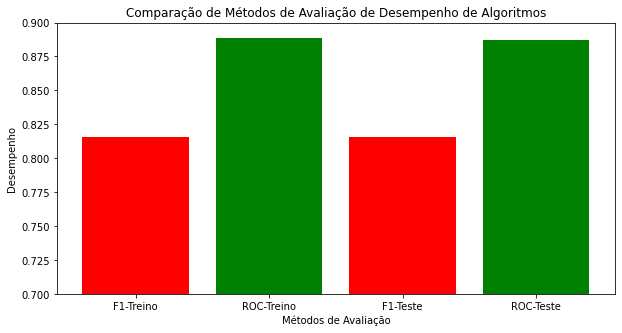

In [123]:
# Determinando o tamanho do gráfico
plt.figure(figsize=(10, 5))

# Defina as posições no eixo x de cada barra
x = ["F1-Treino", "ROC-Treino", "F1-Teste", "ROC-Teste"]

# Defina a altura, escala e cores de cada barra
height = [0.8154, 0.8884, 0.8154, 0.8868]
cores = ['r', 'g', 'r', 'g']
plt.ylim(0.7, 0.9)

# Plot os dados
plt.bar(x, height, label="F1-Treino", color= cores)
plt.bar(x, height, label="ROC-Treino", color= cores)
plt.bar(x, height, label="F1-Teste", color= cores)
plt.bar(x, height, label="ROC-Teste", color= cores)

# Adicione legendas e títulos ao gráfico
plt.xlabel("Métodos de Avaliação")
plt.ylabel("Desempenho")
plt.title("Comparação de Métodos de Avaliação de Desempenho de Algoritmos")

# Exiba o gráfico
plt.show()


### Ajuste de hiperparâmetros

Agora que definimos que o algoritmo Random Forest teve a melhor performance, precisamos obter o conjunto de hiperparâmetros que otimiza a métrica definida para o modelo.

In [53]:
# Definindo nova validação cruzada
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state = SEED)

In [54]:
# Alterando alguns parâmetros do algoritmo Random Forest para torná-lo mais eficiente
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(1, 11)),
    'min_samples_leaf' : range(2, 21, 2),
    'min_samples_split' : range(2, 41, 5),
}

In [55]:
# Vamos rodar novamente o algoritmo agora com os novos parâmetros
rf_model = RandomForestClassifier(max_depth = 5)
rf_model = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = param_grid,
    scoring = 'roc_auc',
    random_state = SEED,
    n_jobs = -1, 
    verbose = 1,
    n_iter = 3
)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=5), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': range(2, 21, 2),
                                        'min_samples_split': range(2, 41, 5)},
                   random_state=1321, scoring='roc_auc', verbose=1)

### Preparação do Modelo Preditivo

In [56]:
# Agora preparamos o modelo preditivo com o algoritmo otimizado
y_pred_proba_train = rf_model.predict_proba(X_train)
y_pred_proba_test = rf_model.predict_proba(X_test)
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [57]:
# Verificando os scores gerais do modelo sobre os dados de treino
y_pred_proba_train

array([[0.00482703, 0.99517297],
       [0.39951   , 0.60049   ],
       [0.3958505 , 0.6041495 ],
       ...,
       [0.89888541, 0.10111459],
       [0.84992177, 0.15007823],
       [0.86541694, 0.13458306]])

In [58]:
# Verificando os scores gerais do modelo sobre os dados de teste
y_pred_proba_test

array([[0.90171777, 0.09828223],
       [0.39633761, 0.60366239],
       [0.39673114, 0.60326886],
       ...,
       [0.39810684, 0.60189316],
       [0.89073232, 0.10926768],
       [0.89961276, 0.10038724]])

In [59]:
# Definindo a avaliação pela Curva ROC para os o modelo rodando sobre os dados de teste e de treino
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test[:, 1])

In [60]:
# Verificando o score da avaliação ROC dos dados de treino
roc_auc_train

0.890093305885533

In [61]:
# Verificando o score da avaliação ROC dos dados de teste
roc_auc_test

0.8871934825131085

In [63]:
# Definindo a variável result para testar os scores do cliente
result = X_test.reset_index()[['id']]
result['SCORE'] = np.multiply(y_pred_proba_test[:, 1], 1000).astype(int)
result['TARGET'] = y_test.values
# Separando os scores por decis (10 divisões nos dados)
result['DECIL'] = pd.qcut(result.SCORE, 10, labels = [i for i in range(1, 11)], duplicates='drop')

In [64]:
result

,id,SCORE,TARGET,DECIL
0,45630330,98,0,1
1,56114485,603,0,5
2,32029382,603,0,5
3,97109191,980,1,8
4,28706788,106,0,1
...,...,...,...,...
74391,81523025,598,1,5
74392,10088950,143,0,4
74393,56613498,601,1,5
74394,26006330,109,1,2


In [65]:
# Vamos mapear a variável preditora para qualificar o score do cliente em forma de string
decile_df = pd.crosstab(
    result['DECIL'],
    result['TARGET'].map({1:'RUIM', 0: 'BOM'}),
    normalize = True
) * 100

In [66]:
decile_df

TARGET,BOM,RUIM
DECIL,,
1,9.626862,0.966450
2,9.703479,1.073982
3,7.969514,0.802462
4,7.821657,2.500134
5,4.567450,7.329695
6,3.352331,5.646809
7,3.789182,6.085005
8,1.680198,9.485725
9,0.000000,7.823001


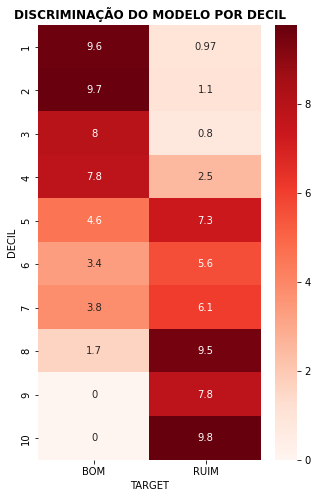

In [67]:
# Agora vamos plotar um mapa de calor pra mostrar as classificações de score dos clientes
fig, ax = plt.subplots(figsize = (5, 8))
ax.set_title('DISCRIMINAÇÃO DO MODELO POR DECIL', weight = 'bold')
sns.heatmap(decile_df, cmap = 'Reds', annot = True, ax = ax)
plt.show()

As regras de negócio do banco definem e classificam a seguinte régua de decisão:
* SCORE < 300: A
    * Decisão: condecer produto
* SCORE >= 300 e SCORE <= 600: B
    * Decisão: mesclar decisão com outro modelo ou decisão do analista
* SCORE > 600: C
    * Decisão: não conceder produto

 

In [68]:
# Agora criamos uma função para classificar os clientes em Risco A, B ou C
def classificar_cliente(score):
    if score < 300: return 'A'
    elif 300 <= score <= 600: return 'B'
    elif score > 600: return 'C'
result['DECISION'] = result.SCORE.apply(classificar_cliente)

In [69]:
result

,id,SCORE,TARGET,DECIL,DECISION
0,45630330,98,0,1,A
1,56114485,603,0,5,C
2,32029382,603,0,5,C
3,97109191,980,1,8,C
4,28706788,106,0,1,A
...,...,...,...,...,...
74391,81523025,598,1,5,B
74392,10088950,143,0,4,A
74393,56613498,601,1,5,C
74394,26006330,109,1,2,A


### Testando o modelo preditivo para classificar o score do cliente

In [70]:
# Teste de cliente com baixo risco
classificar_cliente(150)

'A'

In [71]:
# Teste de cliente com risco mediano
classificar_cliente(450)

'B'

In [72]:
# Teste de cliente com risco alto
classificar_cliente(700)

'C'

## Conclusão

Finalizamos o projeto a partir de uma base de dados de clientes de um banco, onde realizamos uma junção dos dataframes, depois efetivamos uma limpeza nos dados, separamos os dados em treino e teste e realizamos a validação cruzada sobre três algoritmos diferentes usando métodos F1 Score e curva ROC, concluindo que o Random Forest obteve o melhor desempenho. A partir daí otimizamos os hiperparêmetros desse algoritmo e preparamos o modelo para prever o score do cliente e depois classificá-lo de acordo com a regra de negócio estabelecida pelo Banco, que é a de quanto menor o score, mais seguro é para o banco emprestar dinheiro ou aumentar limite de crédito. Por fim testamos a função final que classifica o cliente nos diferentes níveis de risco definido pela empresa, obtendo sucesso na tarefa de classificação em risco A, B ou C.

O próximo passo para deixar o projeto mais preparado para uso será o de realizar uma conexão com banco de dados SQL codificando com ajuda de biblioteca específica, para consumir dados de clientes novos e passar pela esteira de processamento deste modelo e predizer o risco do cliente, criar uma API para se conecar a um sistema legado do banco para automatização do processo de análise e também uma forma de visualização aprimorada do modelo, caso seja necessário para a instência negocial da empresa ter uma visualização do processo que ocorre de modo transparente pelo back-end do banco.